### Unsupervised Learning and Visualizations
- Try to do clustering (KMeans on the doc-to-term matrix)
- Visualize dataset and inspect 

In [1]:
import pandas as pd
import numpy as np

import sklearn.cluster as cluster
from sklearn.manifold import TSNE

import matplotlib.patches as mpatches
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import umap

import pickle

%matplotlib inline

Import pickled data

In [2]:
with open('../data/doc_words.pkl','rb') as fin:
    doc_word = pickle.load(fin)
with open('../data/nmf.pkl','rb') as fin:
    nmf = pickle.load(fin)
with open('../data/df_combined.pkl','rb') as fin:
    dfc = pickle.load(fin)

### Try UMAP Clustering on the doc-to-term matrix

In [3]:
k_comp = ['k'+str(i) for i in range(1,10)]

#### UMAP with Kmeans of 9

In [4]:
# Transform doc-to-term matrix
embedding_ori = umap.UMAP().fit_transform(doc_word)

In [5]:
# Get labels from kmeans clustering
kmeans_labels = cluster.KMeans(n_clusters=9).fit_predict(doc_word)

In [7]:
# Setup color scheme and legend
colorpal = cm.get_cmap('tab10', 9)
# colorpal.colors

legend_list = []
colors = colorpal.colors

for i in range(len(k_comp)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

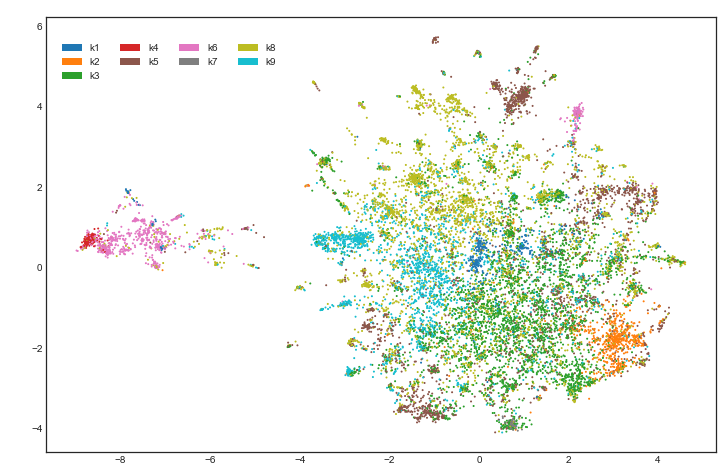

In [8]:
# plot result
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(12,8))
plt.scatter(embedding_ori[:, 0], embedding_ori[:, 1], c=kmeans_labels, s=1.0, cmap=colorpal);
fig.legend(legend_list, k_comp, loc=(0.08,0.82),ncol=4)
fig.savefig('../docs/figures/umap_Kmeans_dtm.png',transparent=True);

---

### Try UMAP Clustering on the NMF-reduced document

#### UMAP, w/ Kmeans of 9

In [9]:
# transform the matrix
doc_nmf = np.asarray(dfc.iloc[:,:-2])
embedding = umap.UMAP().fit_transform(doc_nmf)

In [10]:
# Kmeans
kmeans_labels = cluster.KMeans(n_clusters=9).fit_predict(doc_nmf)

In [11]:
# setup color palette and legends
colorpal = cm.get_cmap('tab10', 9)

legend_list = []
colors = colorpal.colors

for i in range(len(k_comp)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

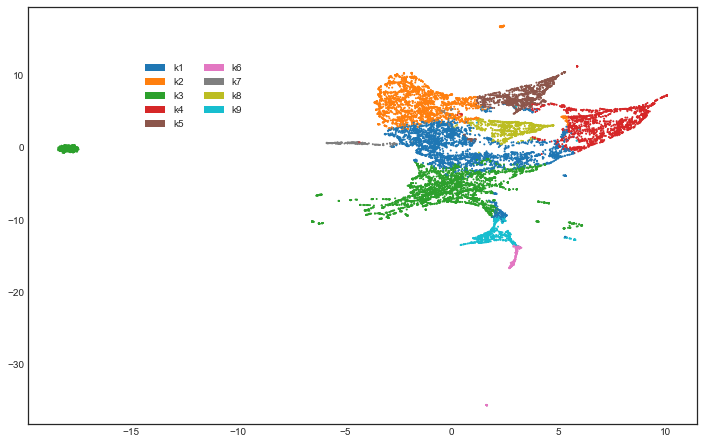

In [13]:
# plot kmeans of transformed nmf matrix 

fig = plt.figure(figsize=(12,8))
plt.style.use('seaborn-white')

plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, s=1.0, cmap=colorpal)

fig.legend(legend_list, k_comp, loc=(0.2,0.7),ncol=2)
plt.subplots_adjust(top=0.85);
plt.savefig('../docs/figures/nmf_kmeans9.png',transparent=True)

---

### Try T-SNE To Project hyperdimensional dataset into 2D

- example from kaggle [kernel](https://www.kaggle.com/xdsarkar/nips-papers-visualized-with-nmf-and-t-sne)

In [76]:
# tsne embedding 
nmf_embedding = nmf.transform(doc_word)
nmf_embedding = (nmf_embedding - nmf_embedding.mean(axis=0))/nmf_embedding.std(axis=0)

In [85]:
# tsne 
tsne = TSNE(random_state=3211)
tsne_embedding = tsne.fit_transform(nmf_embedding)
df_tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
df_tsne_embedding['label'] = nmf_embedding.argmax(axis=1)

In [86]:
# Create a dataframe with 
dfsne = pd.concat((dfc.iloc[:,[-2,-1]], df_tsne_embedding),axis=1)

In [87]:
dfsne.head()

,title,summary,x,y,label
0,A. Aiyappan,Ayinapalli Aiyappan (5 February 1905 – 28 June...,-3.102488,27.311386,2
1,A. D. Gardner,"Arthur Duncan Gardner, FRCP, FRCS (28 March 18...",-28.697096,-14.007818,0
2,A. E. V. Richardson,"Arnold Edwin Victor Richardson MA, BSc., (12 S...",-0.401493,-11.332919,0
3,A. G. Mearns,Dr Alexander Gow Mearns FRSE MBE (1903–1968) w...,6.865325,23.977526,4
4,A. M. Mubarak,Azeez Mohamed Mubarak (born 4 July 1951) is a ...,-45.559414,-45.601959,0


In [88]:
# Check out an entry
dfsne[dfsne.index==4958]

,title,summary,x,y,label
4958,Hadley_Wickham,Hadley Wickham is a statistician from New Zea...,-20.581877,-42.750313,6


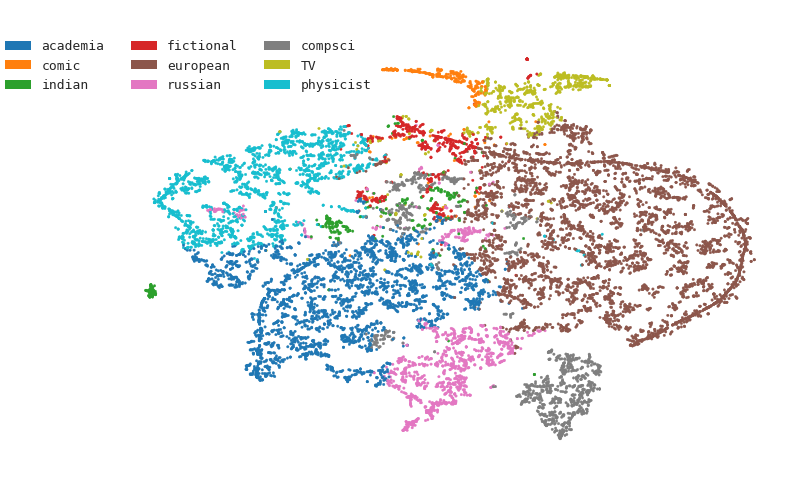

In [99]:
# plot t-SNE on dtm matrix
topics = ['academia','comic', 'indian', 'fictional', 'european', 'russian', 'compsci', 'TV', 'physicist']    

matplotlib.rc('font',family='monospace')
plt.style.use('seaborn-talk')

fig, axs = plt.subplots( figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)

count = 0
legend = []

data = dfsne
scatter = axs.scatter(data=data, x='x', y='y', s=6, c=data['label'], cmap=colorpal)
axs.axis('off')

fig.legend(legend_list,topics,loc=(0.0,0.80),ncol=3)
plt.subplots_adjust(top=0.85)
plt.savefig('../docs/figures/nmf_tsne.png',transparent=True)
plt.show()

#### Try look for some people

In [92]:
# Create a Subset of non-datascientist and non-academia
df_nonDataAcad = dfsne[(dfsne.label!=6) & (dfsne.label!=0)]

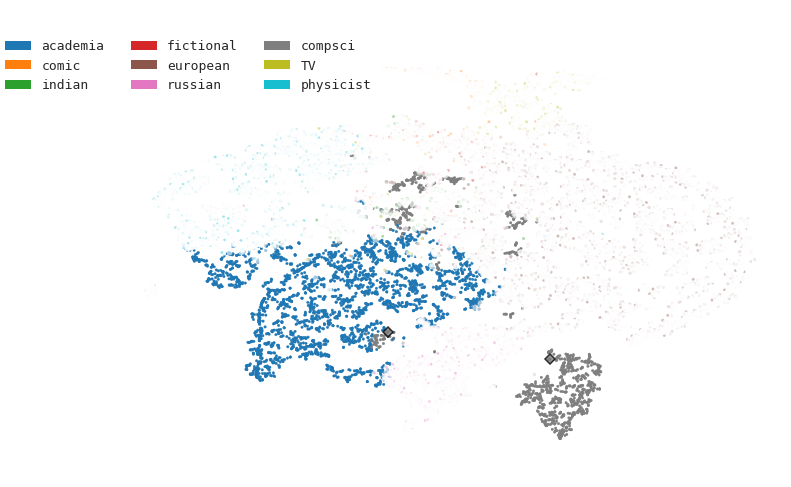

In [100]:
# Plot t-SNE on dtm-matrix
matplotlib.rc('font',family='monospace')
plt.style.use('seaborn-talk')

fig, axs = plt.subplots( figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)

count = 0
legend = []

data = dfsne
scatter = axs.scatter(data=data, x='x', y='y', s=6, c=data['label'], cmap=colorpal)
axs.axis('off')

plt.plot(df_nonDataAcad.iloc[:,2],df_nonDataAcad.iloc[:,3],'o',markersize=6, markerfacecolor='white', alpha=0.6)
plt.plot(dfsne.iloc[[4958,9016],2],dfsne.iloc[[4958,9016],3],'D',markersize=7, markerfacecolor='gray', alpha=0.8, markeredgecolor='black',markeredgewidth=1.5,)

fig.legend(legend_list,topics,loc=(0.0,0.80),ncol=3)
plt.subplots_adjust(top=0.85)
plt.savefig('../docs/figures/nmf_tsne_queries.png',transparent=True)
plt.show()

- data points indicated by diamonds correspond to 'Hadley Wickham' and 'Ricardo Bianchini'

---